# Covid19 Data Analysis

#### Overview
...

In [46]:
import datetime
import pprint
import os
import io
import re
import glob
import json
import math
# aws
import boto3
# quant analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm
# import sklearn.datasets
import scipy.stats
# data viz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import bokeh

In [20]:
def CONFIG():
    """"""
    pid = 'analysis-covid19'
    now = datetime.datetime.now()
    cwd = os.getcwd()
    data = os.path.join(cwd,'out')
    
    cfg = {
        'out': data,
        'covid': os.path.join(data,'covid'),
        'demo': os.path.join(data,'demo'),
        'files': glob.glob(os.path.join(data,'*','*.parquet.gzip'),recursive=True),
    }
    
    return cfg

In [17]:
class Covid19: # naming convention: GoodName
    """
    Class for retrival, storage, and manipulation
      of Covid19 data.
    """
    
    __slots__ = ('fpath','dataframe',)
    
    def __init__(self,fpath):
        self.fpath = fpath
        self.dataframe = _load()
        self.is_clean = 0
        self.is_processed = 0
    
    @staticmethod # static methods - does it make sense to call a class method
    # EVEN BEFORE a class has been created? e.g. metric conversion info
    def define():
        return '\
            Coronavirus disease 2019 (COVID-19) \
            is an infectious disease caused by severe \
            acute respiratory syndrome coronavirus 2 \
            (SARS-CoV-2).[10] It was first identified in \
            December 2019 in Wuhan, Hubei, China, and has \
            resulted in an ongoing pandemic.\
        '
    
    def __repr__(self):
        return f'Covid19({self.fpath!r})'
    def __str__(self):
        return f'Covid19 dataset - {self.fpath}'
    def _load(self):
        return pd.read_parquet(self.fpath,header=0)
    
    # instance method
    def clean(self):
        try:
            df = self.dataframe
            # ...
            self.dataframe = df
            self.is_clean = 1
        except:
            raise
    
    # instance method
    def process(self):
        try:
            assert self.is_clean==1
            df = self.dataframe
            # ...
            self.dataframe = df
            self.is_processed = 1
        except AssertionError:
            self.clean()
            self.process()
        except:
            raise
    

In [68]:
def SUMMARY(series, sample=2):
    """"""
    unique = series.unique()
    values = series.dropna()
    dtype = str(type(values[0])).split('\'')[1]
    
    return {
        'dtype': dtype, # c.dtypes
        'sample': series.sample(n=sample).to_list(), # .sample(n=math.ceil(series.shape[0]*sample)),
        'countA': series.shape[0],
        'countD': len(unique),
        'countV': series.count(),
        'countNaN': series.isna().sum(),
        'min': min(values),
        'mode': series.mode().to_list(),
        'max': max(values),
        'median': series.median() if dtype!='str' else None,
        'mean': round(series.mean(),2) if dtype!='str' else None,
        'std': round(series.std(),2) if dtype!='str' else None,
    }

In [ ]:
def REGRESS():
    """"""
    df = data['jhu-csse-dly-us'].dropna()
    x = df.loc[:,['CONFIRMED','DEATHS']]
    y = df['MORTALITY_RATE']
    mod = sm.OLS(y,x).fit()

    return mod.summary()

In [25]:
def PLOT(df,xaxis,yaxis,split):
    """"""
    sns.set_theme(style='ticks')
    return sns.lmplot(
        x=xaxis,y=yaxis,
        data=df,hue=split,
#         palette='husl',
    ) 

In [38]:
def PREP(df):
    """"""
    # dates
    date_field = 'DATA_DT'
    date_format = '%Y-%m-%d'
    df.date_field = df.date_field.apply(lambda x: x.strftime(date_format))
    # other...
    
    return df

In [21]:
if __name__=='__main__':
    CFG = CONFIG()
    
    data = {}
    for file in CFG['files']:
        fname = os.path.basename(file).split('.')[0]
        data[fname] = pd.read_parquet(file)
#     data.keys()

    PLOT(data['jhu-csse-dly-us'],'DATA_DT','CONFIRMED','PROVINCE_STATE')

In [67]:
pprint.pprint(SUMMARY(df.CONFIRMED))

{'countA': 1120,
 'countD': 953,
 'countNaN': 0,
 'countV': 1120,
 'dtype': 'numpy.int64',
 'max': 304372,
 'mean': 13806.78,
 'median': 3547.5,
 'min': 0,
 'mode': [0],
 'sample': [444, 4886],
 'std': 35496.285812066744}


In [79]:
states = ['Virginia','Florida','New York','California','Texas']
df = data['jhu-csse-dly-us']
df.PROVINCE_STATE = df.loc[df.PROVINCE_STATE.isin(states)]

<AxesSubplot:xlabel='DATA_DT', ylabel='CONFIRMED'>

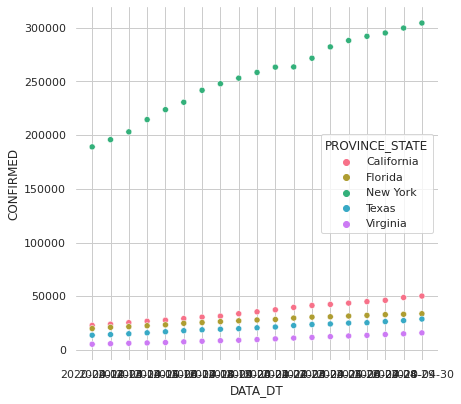

In [80]:

sns.set_theme(style='whitegrid')
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(
    x='DATA_DT',
    y='CONFIRMED',
    data=df,
    hue='PROVINCE_STATE',
    palette='husl',legend='auto',
#     scatter_kws={"s": 50, "alpha": 1},
    ax=ax,
) 